# Intelligent Fitness Recommendation System

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11p30XD-a83GTM2b3IwDfFg3g9wm4e9bz)

## Overview
Fuzzy logic-based exercise recommendation system providing personalized workout intensity and duration based on individual characteristics and goals.

## Contributors
- Abolfazl Ranjbar - [GitHub](https://github.com/ImRanjbar)
- Miaad Kimiagari - [GitHub](https://github.com/Miaad2004)
- Taha Najaf - [GitHub](https://github.com/taha-najaf)

## Objectives
- Implement multi-parameter fuzzy inference system
- Design comprehensive rule base for exercise recommendations
- Create interactive user interface for real-time recommendations
- Visualize membership functions and system behavior

## System Architecture
**Inputs**: Physical readiness, energy level, fitness goals, age, weight, motivation  
**Outputs**: Exercise intensity (0-10), exercise duration (0-60 min)  
**Method**: Mamdani fuzzy inference with triangular/trapezoidal membership functions

## Library Setup

Required dependencies for fuzzy logic implementation and interactive widgets.

In [1]:
!pip -q install ipywidgets

try:
  import skfuzzy as fuzz

except:
  !pip -q install scikit-fuzzy

finally:
  import skfuzzy as fuzz

import numpy as np
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


## Fuzzy Variable Architecture

Definition of input and output fuzzy variables with their respective universes of discourse.

In [2]:
physical_readiness = ctrl.Antecedent(np.arange(0, 11, 1), "physical_readiness")
energy_level = ctrl.Antecedent(np.arange(0, 11, 1), "energy_level")
fitness_goal = ctrl.Antecedent(np.arange(0, 13, 1), "fitness_goal")
age = ctrl.Antecedent(np.arange(18, 101, 1), "age")
weight = ctrl.Antecedent(np.arange(30, 151, 1), "weight")
motivation = ctrl.Antecedent(np.arange(0, 11, 1), 'motivation')
exercise_intensity = ctrl.Consequent(np.arange(0, 11, 1), "exercise_intensity")
exercise_duration = ctrl.Consequent(np.arange(0, 61, 1), "exercise_duration")

## Membership Function Definitions

Triangular and trapezoidal membership functions for all input and output variables.

In [3]:
physical_readiness["beginner"] = fuzz.trimf(physical_readiness.universe, [0, 0, 4])
physical_readiness["intermediate"] = fuzz.trimf(physical_readiness.universe, [3, 5, 7])
physical_readiness["advanced"] = fuzz.trimf(physical_readiness.universe, [6, 10, 10])

energy_level["low"] = fuzz.trimf(energy_level.universe, [0, 0, 4])
energy_level["mid"] = fuzz.trimf(energy_level.universe, [3, 5, 7])
energy_level["high"] = fuzz.trimf(energy_level.universe, [6, 10, 10])

fitness_goal["maintenance"] = fuzz.trimf(fitness_goal.universe, [0, 2, 4])
fitness_goal["weight_loss"] = fuzz.trimf(fitness_goal.universe, [3, 6, 9])
fitness_goal["muscle_gain"] = fuzz.trimf(fitness_goal.universe, [8, 11, 12])

age["young"] = fuzz.trimf(age.universe, [18, 25, 30])
age["middle_aged"] = fuzz.trimf(age.universe, [30, 45, 60])
age["old"] = fuzz.trimf(age.universe, [55, 70, 80])

weight["underweight"] = fuzz.trimf(weight.universe, [30, 40, 55])
weight["normal"] = fuzz.trimf(weight.universe, [50, 65, 80])
weight["overweight"] = fuzz.trimf(weight.universe, [75, 90, 110])
weight["obese"] = fuzz.trimf(weight.universe, [100, 120, 150])

exercise_intensity["low"] = fuzz.trapmf(exercise_intensity.universe, [0, 0, 2, 4])
exercise_intensity["mid"] = fuzz.trapmf(exercise_intensity.universe, [3, 4, 6, 7])
exercise_intensity["high"] = fuzz.trapmf(exercise_intensity.universe, [6, 8, 10, 10])

exercise_duration["short"] = fuzz.trapmf(exercise_duration.universe, [0, 0, 10, 20])
exercise_duration["mid"] = fuzz.trapmf(exercise_duration.universe, [15, 25, 35, 45])
exercise_duration["long"] = fuzz.trapmf(exercise_duration.universe, [40, 50, 60, 60])

motivation['low'] = fuzz.trimf(motivation.universe, [0, 0, 4])
motivation['medium'] = fuzz.trimf(motivation.universe, [3, 5, 7])
motivation['high'] = fuzz.trimf(motivation.universe, [6, 10, 10])

## Fuzzy Rule Base System

Comprehensive rule set incorporating multiple input interactions for intelligent exercise recommendations.

In [4]:
from skfuzzy import control as ctrl

rules = [
    # Physical Readiness vs. Energy Level
    ctrl.Rule(physical_readiness['beginner'] & energy_level['low'],
              consequent=[exercise_duration['short'], exercise_intensity['low']]),
    ctrl.Rule(physical_readiness['beginner'] & energy_level['mid'],
              consequent=[exercise_duration['short'], exercise_intensity['low']]),
    ctrl.Rule(physical_readiness['beginner'] & energy_level['high'],
              consequent=[exercise_duration['mid'], exercise_intensity['mid']]),

    ctrl.Rule(physical_readiness['intermediate'] & energy_level['low'],
              consequent=[exercise_duration['mid'], exercise_intensity['low']]),
    ctrl.Rule(physical_readiness['intermediate'] & energy_level['mid'],
              consequent=[exercise_duration['mid'], exercise_intensity['mid']]),
    ctrl.Rule(physical_readiness['intermediate'] & energy_level['high'],
              consequent=[exercise_duration['long'], exercise_intensity['high']]),

    ctrl.Rule(physical_readiness['advanced'] & energy_level['low'],
              consequent=[exercise_duration['mid'], exercise_intensity['mid']]),
    ctrl.Rule(physical_readiness['advanced'] & energy_level['mid'],
              consequent=[exercise_duration['long'], exercise_intensity['mid']]),
    ctrl.Rule(physical_readiness['advanced'] & energy_level['high'],
              consequent=[exercise_duration['long'], exercise_intensity['high']]),

    # Fitness Goal vs. Age and Weight
    ctrl.Rule(fitness_goal['weight_loss'] & age['young'] & weight['underweight'],
              consequent=[exercise_intensity['low'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['weight_loss'] & age['young'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['long']]),
    ctrl.Rule(fitness_goal['weight_loss'] & age['young'] & weight['overweight'],
              consequent=[exercise_intensity['high'], exercise_duration['long']]),
    ctrl.Rule(fitness_goal['weight_loss'] & age['middle_aged'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['weight_loss'] & age['middle_aged'] & weight['overweight'],
              consequent=[exercise_intensity['high'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['weight_loss'] & age['old'] & weight['overweight'],
              consequent=[exercise_intensity['mid'], exercise_duration['short']]),

    ctrl.Rule(fitness_goal['muscle_gain'] & age['young'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['muscle_gain'] & age['young'] & weight['overweight'],
              consequent=[exercise_intensity['high'], exercise_duration['long']]),
    ctrl.Rule(fitness_goal['muscle_gain'] & age['middle_aged'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['muscle_gain'] & age['middle_aged'] & weight['overweight'],
              consequent=[exercise_intensity['high'], exercise_duration['long']]),
    ctrl.Rule(fitness_goal['muscle_gain'] & age['old'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['short']]),

    ctrl.Rule(fitness_goal['maintenance'] & age['young'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['maintenance'] & age['middle_aged'] & weight['normal'],
              consequent=[exercise_intensity['mid'], exercise_duration['long']]),
    ctrl.Rule(fitness_goal['maintenance'] & age['old'] & weight['normal'],
              consequent=[exercise_intensity['low'], exercise_duration['mid']]),
    ctrl.Rule(fitness_goal['maintenance'] & age['old'] & weight['overweight'],
              consequent=[exercise_intensity['mid'], exercise_duration['short']]),

    # Weight vs. Physical Readiness
    ctrl.Rule(weight['underweight'] & physical_readiness['beginner'],
              consequent=[exercise_intensity['low'], exercise_duration['mid']]),
    ctrl.Rule(weight['underweight'] & physical_readiness['intermediate'],
              consequent=[exercise_intensity['low'], exercise_duration['mid']]),
    ctrl.Rule(weight['underweight'] & physical_readiness['advanced'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),

    ctrl.Rule(weight['normal'] & physical_readiness['beginner'],
              consequent=[exercise_intensity['low'], exercise_duration['mid']]),
    ctrl.Rule(weight['normal'] & physical_readiness['intermediate'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),
    ctrl.Rule(weight['normal'] & physical_readiness['advanced'],
              consequent=[exercise_intensity['mid'], exercise_duration['long']]),

    ctrl.Rule(weight['overweight'] & physical_readiness['beginner'],
              consequent=[exercise_intensity['low'], exercise_duration['short']]),
    ctrl.Rule(weight['overweight'] & physical_readiness['intermediate'],
              consequent=[exercise_intensity['mid'], exercise_duration['mid']]),
    ctrl.Rule(weight['overweight'] & physical_readiness['advanced'],
              consequent=[exercise_intensity['high'], exercise_duration['long']]),

    ctrl.Rule(weight['obese'] & physical_readiness['beginner'],
              consequent=[exercise_intensity['low'], exercise_duration['short']]),
    ctrl.Rule(weight['obese'] & physical_readiness['intermediate'],
              consequent=[exercise_intensity['mid'], exercise_duration['short']]),
    ctrl.Rule(weight['obese'] & physical_readiness['advanced'],
              consequent=[exercise_intensity['high'], exercise_duration['mid']]),

    # Age-specific rules
    ctrl.Rule(age['young'] & fitness_goal['weight_loss'],
              consequent=[exercise_intensity['mid'], exercise_duration['long']]),
    ctrl.Rule(age['middle_aged'] & fitness_goal['weight_loss'],
              consequent=[exercise_intensity['high'], exercise_duration['mid']]),
    ctrl.Rule(age['old'] & fitness_goal['weight_loss'],
              consequent=[exercise_intensity['mid'], exercise_duration['short']]),

    # motivation
    ctrl.Rule(motivation['low'], consequent=[exercise_intensity['low'], exercise_duration['short']]),
    ctrl.Rule(motivation['high'], consequent=[exercise_intensity['high'], exercise_duration['long']]),


]

fis = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(fis)


## Recommendation Engine

Fuzzy inference system implementation with personalized exercise recommendation functionality.

In [5]:
def recommend_exercise(workout_style, fitness_goal_value, physical_readiness_value, energy_level_value, age_value, weight_value, motivation_value):
    fitness_goal_crisp_map = {"Maintenance": 0, "Weight Loss": 6, "Muscle Gain": 12}

    sim.input['physical_readiness'] = physical_readiness_value
    sim.input['energy_level'] = energy_level_value
    sim.input['fitness_goal'] = fitness_goal_crisp_map[fitness_goal_value]
    sim.input['age'] = age_value
    sim.input['weight'] = weight_value
    sim.input['motivation'] = motivation_value


    sim.compute()

    intensity = sim.output['exercise_intensity']
    duration = sim.output['exercise_duration']

    # multiplexers
    if workout_style == 'Relaxed':
      sim.output['exercise_intensity'] *= 0.8
      sim.output['exercise_duration'] *= 0.8

    elif workout_style == 'Intense':
        sim.output['exercise_intensity'] *= 1.2
        sim.output['exercise_duration'] *= 1.2

    intensity = min(sim.output['exercise_intensity'], 10)
    duration = min(sim.output['exercise_duration'], 60)

    print("\n🏋️‍♀️ Personalized Exercise Recommendation")
    print("-------------------------------------")
    print(f"📈 Recommended Intensity: {intensity:.2f} / 10")
    print(f"⏱️ Recommended Duration: {duration:.2f} minutes")

    exercise_intensity.view(sim)
    exercise_duration.view(sim)

## Interactive User Interface

Widget-based interface for real-time exercise recommendations with parameter adjustment.

In [6]:
import ipywidgets as widgets
from ipywidgets import interact


interact(recommend_exercise,
         workout_style = widgets.ToggleButtons(
            options=['Relaxed', 'Balanced', 'Intense'],
            value='Balanced',
            description='Workout Style'
        ),

         fitness_goal_value=widgets.ToggleButtons(
             options=["Maintenance", "Weight Loss", "Muscle Gain"],
             value="Weight Loss",
             description="Fitness Goal"
         ),

         physical_readiness_value=widgets.IntSlider(min=0, max=10, step=1, value=5, description="Readiness"),
         energy_level_value=widgets.IntSlider(min=0, max=10, step=1, value=5, description="Energy Level"),
         age_value=widgets.IntSlider(min=18, max=100, step=1, value=30, description="Age"),
         weight_value=widgets.IntSlider(min=30, max=150, step=1, value=70, description="Weight"),
         motivation_value=widgets.IntSlider(min=0, max=10, step=1, value=5, description="Motivation")
)


interactive(children=(ToggleButtons(description='Workout Style', index=1, options=('Relaxed', 'Balanced', 'Int…

<function __main__.recommend_exercise(workout_style, fitness_goal_value, physical_readiness_value, energy_level_value, age_value, weight_value, motivation_value)>

## System Visualization

Membership function plots for all fuzzy variables to analyze system behavior and variable distributions.

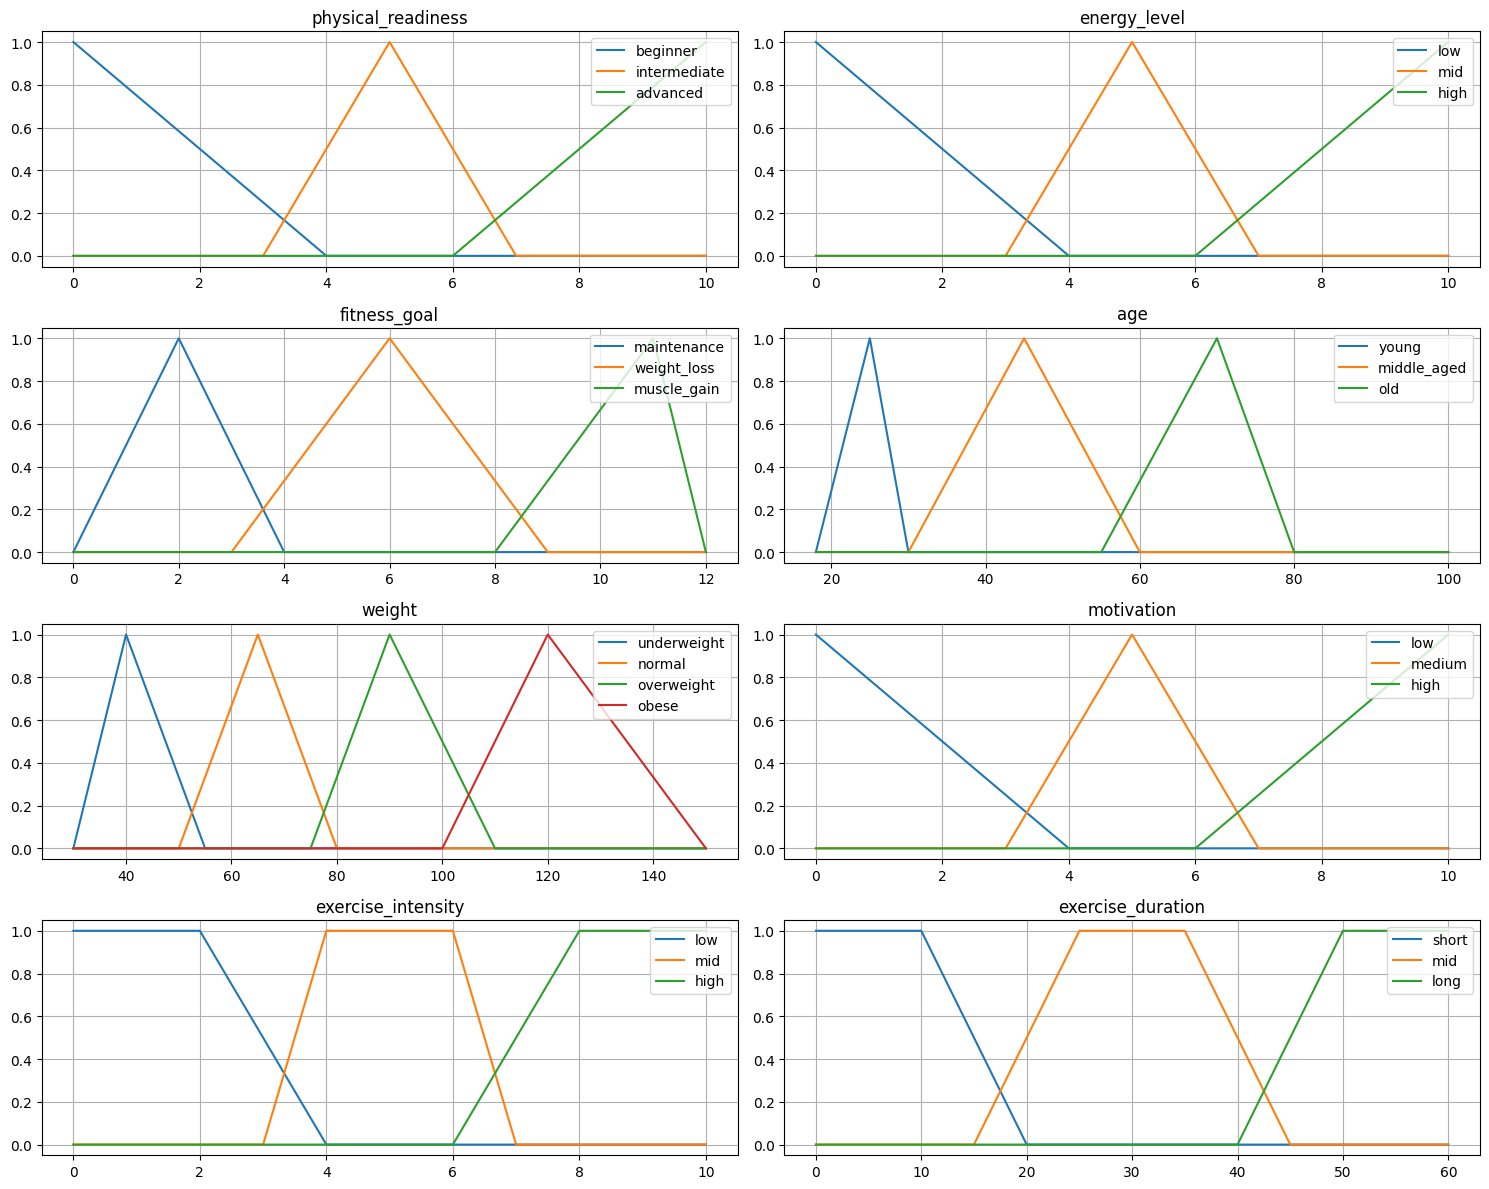

In [7]:
import matplotlib.pyplot as plt

def plot_membership_funcs(variables):
    num_vars = len(variables)
    cols = 2
    rows = (num_vars + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for i, var in enumerate(variables):
        ax = axes[i]
        for term_name in var.terms:
            ax.plot(var.universe, var[term_name].mf, label=term_name)
        ax.set_title(f"{var.label}", fontsize=12)
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='upper right')
        ax.grid(True)

    # hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_membership_funcs([
    physical_readiness,
    energy_level,
    fitness_goal,
    age,
    weight,
    motivation,
    exercise_intensity,
    exercise_duration
])

